In [ ]:
# "Perceptron-learning.ipynb" by Dr. Konda Reddy Mopuri 
# is licensed under CC BY-NC 4.0 (https://creativecommons.org/licenses/by-nc/4.0/) 
# Author: Dr. Konda Reddy Mopuri
# Indian Institute of Technology Hyderabad
# Date: January 2023

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create data sampling from two Gaussian distributions

D1=torch.normal(0.0, 1.0,size=[100,2])
D2=torch.normal(3.0, 1.0,size=[100,2])

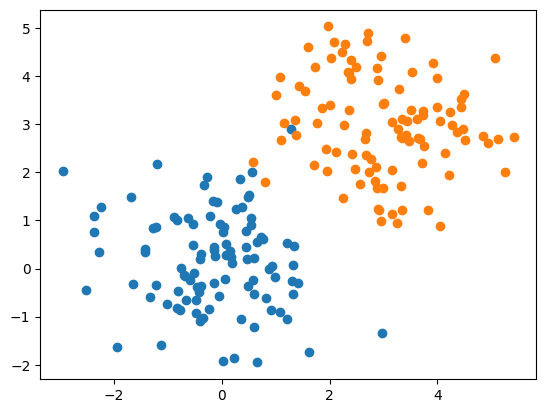

In [5]:
# plot the data

plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])

In [6]:
# Add the extra dimension (1) to data 

X=torch.empty(200,D1.size(1)+1).fill_(1)
X[::2,:2] = D1 # every alternate X row, starting from the 0th row, is filled with elements of D1
X[1::2,:2] = D2 # every alternate X row, starting from the 1th row, is filled with elements of D2
print(X.shape)

# prepare the labels
Y=torch.empty(200,1)
Y[::2,:2] = 1.0
Y[1::2,:2] = -1.0
print(Y.shape)


torch.Size([200, 3])
torch.Size([200, 1])


In [11]:
# Initialize W with all 0s
W = torch.zeros(X.size(1))
W = np.array(W)
print(W.shape)

(3,)


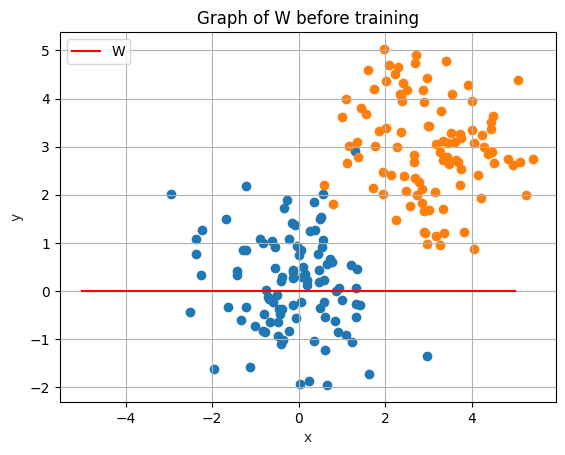

In [8]:
# plot the data and W before training

x = np.linspace(-5,5,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

In [9]:
#The perceptron training algorithm

def train_perceptron(x, y, w, nb_epochs_max):  
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(x.size(0)):
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    #print('Number of changes: %d'%nb_changes) # prints the number of changes every epoch
    if nb_changes == 0:
        print('Early stopping at epoch number %d',e) 
        break;
  print('Number of changes: %d'%nb_changes)  # prints the number of chages in the end  
  return w

In [12]:
# Call the traning algorithm

W = train_perceptron(X,Y, W, 5)
print(W)

TypeError: dot(): argument 'tensor' (position 1) must be Tensor, not numpy.ndarray

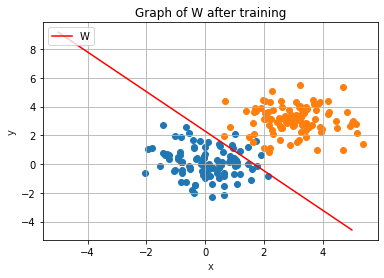

In [ ]:
# Plot the data and W after training

x = np.linspace(-5,5,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()